#CafChem tools for reading ChEMBL data and performing basic Machine Learning analysis.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioCafiero/CafChem/blob/main/notebooks/BasicML_CafChem.ipynb)

## This notebook allows you to:
- Read in a CSV file directly from ChEMBL and clean it up.
- featurize data, remove outliers, perform scaling and/or PCA. Split data into training and validation sets.
- fit a wide range of models, from tree-based methods, to linear methods, to support vectore regression, to multilayer perceptrons.
- visualize predicted data.
- save CSV files with the clean data.
- save models and/or features as pickle files.

## Requirements:
- This notebook will install deepchem and mordred
- It will pull the CafChem tools from Github.
- It will install all needed libraries.

### install some libraries
- will require a restart

In [1]:
! pip install deepchem
! pip install mordred

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 66.9 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176718 sha256=4ee2945dcc8a9e11aed4726d1ded41eebe76401fb0a49af49293535de953ed43
  Stored in directory: /root/.cache/pip/wheels/8b/30/0b/84e3f6775306e74cf5957ee4d16b10bf3927dcec44cc23d5f2
Successfully built mordred
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: networkx
    Found existing

### Pull CafChem from github and load needed libraries

In [6]:
!git clone https://github.com/MauricioCafiero/CafChem.git

Cloning into 'CafChem'...
remote: Enumerating objects: 623, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 623 (delta 142), reused 45 (delta 45), pack-reused 423 (from 1)
Receiving objects: 100% (623/623), 40.84 MiB | 26.71 MiB/s, done.
Resolving deltas: 100% (360/360), done.


In [7]:
import numpy as np
import pandas as pd
import pickle
import CafChem.CafChemBML as ccml

print("All libraries loaded!")

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


All libraries loaded!


## Load and process a CSV file from ChEMBL
- assumes the usual column headings and separator from ChEMBL
- cleans data to get only confident IC50 values in nM (this can be changed), converts to canonical smiles and drops duplicates.
- returns a dataframe with only SMILES, IC50 and logIC50.

- function below plots the input IC50 data to view the spread.

In [8]:
df = ccml.process_chembl_csv("/content/MAOB_ChEMBL2.csv")
df.head()

Dataframe created from /content/MAOB_ChEMBL2.csv. Number of unique SMILES: 4015


,SMILES,IC50,logIC50
4,Cn1c(=O)c2c(nc(OCc3ccccc3)n2C)n(C)c1=O,1240.00,3.093422
5,Cn1c(=O)c2c(nc(OCc3cccc(C(F)(F)F)c3)n2C)n(C)c1=O,3720.00,3.570543
8,CCc1ccc(NC(=S)N/N=C/c2ccc(-n3nc4c(c3C)N(C)S(=O...,2910.00,3.463893
16,O=C(CCCc1ccccc1)Nc1nc2cc(Cl)ccc2c(=O)s1,76.40,1.883093
18,O=C(COc1cccc(Cl)c1)Nc1nc2ccccc2c(=O)s1,1.63,0.212188


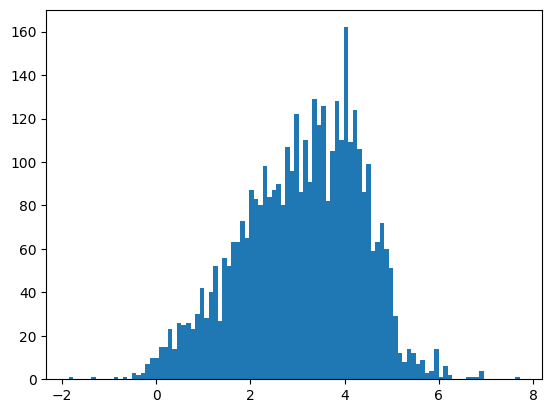

In [9]:
ccml.list_hist(df["logIC50"].to_list(),200)

## Featurize data
- featurize with either circular fingerprints, rdkit descriptors or
mordred descriptors (these take a while!)
- Checks to NaNs and removes them.
- returns features array, target array, and smiles array with NaNs removed

In [10]:
f, y, smiles = ccml.featurize(df["SMILES"].to_list(), df["logIC50"].to_list(), featurizer="rdkit")

Row 921 has a NaN.
Row 3920 has a NaN.
Row 3921 has a NaN.
Row 3922 has a NaN.
Row 3923 has a NaN.
Row 3924 has a NaN.
Row 3959 has a NaN.
Old dimensions are: (4015, 217).
Deleting row 921 from arrays.
Deleting row 3919 from arrays.
Deleting row 3919 from arrays.
Deleting row 3919 from arrays.
Deleting row 3919 from arrays.
Deleting row 3919 from arrays.
Deleting row 3953 from arrays.
New dimensions are: (4008, 217)


## Remove outliers from the data
- returns feature array, target array, and SMILES array without outliers.

In [ ]:
f, y, smiles = ccml.remove_outliers(f, y, smiles)

/usr/local/lib/python3.11/dist-packages/sklearn/covariance/_robust_covariance.py:749: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


Outliers found in the following locations: (array([  28,  388,  437,  463,  464,  465,  485,  574,  621,  724,  885,
       1119, 1216, 1351, 1551, 1552, 1553, 1816, 1900, 1979, 1994, 2395,
       2467, 2492, 2493, 2494, 2495, 2626, 2710, 2726, 2920, 2964, 2975,
       3253, 3355, 3495, 3498, 3691, 3776, 3976, 4004]),)
Starting outlier removal.
Deleting row 28 from dataset
Deleting row 387 from dataset
Deleting row 435 from dataset
Deleting row 460 from dataset
Deleting row 460 from dataset
Deleting row 460 from dataset
Deleting row 479 from dataset
Deleting row 567 from dataset
Deleting row 613 from dataset
Deleting row 715 from dataset
Deleting row 875 from dataset
Deleting row 1108 from dataset
Deleting row 1204 from dataset
Deleting row 1338 from dataset
Deleting row 1537 from dataset
Deleting row 1537 from dataset
Deleting row 1537 from dataset
Deleting row 1799 from dataset
Deleting row 1882 from dataset
Deleting row 1960 from dataset
Deleting row 1974 from dataset
Deleting row 2

## Prepare data for modelling
 - can opt to scale data
 - can opt to perform PCA
 - split into training and vaidation sets at a chosen percentage

In [11]:
x_train, x_valid, y_train, y_valid, smiles_train, smiles_valid, pca, scaler =  ccml.scale_pca_split(f, y, smiles, use_scaler = True,
                    use_pca = False, pca_size = 100, seed = 42, splits = 0.9)

Pre-processing done.


## Perform modelling
- choose from tree regression methods (decision tree, random forest, or gradient boosting).
- choose from linear regression methods (linear, ridge and lasso) or support vector regression.
- choose a multilayer perceptron.
- perform k-means analysis
- hyperparameters are optional. Hover over to see what may be changed

In [12]:
rf = ccml.tree_regression(method="forest")
tree_model = rf.fit(x_train, x_valid, y_train, y_valid)

Tree regression class initialized.
model selected:  RandomForest
fit model in: 0.6318201121000129 minutes
score for training set:  0.9351193581016939
score for validation set:  0.6176081055476346


In [ ]:
lin = ccml.linear_svr_methods(method="svr")
svr_model = lin.fit(x_train, x_valid, y_train, y_valid)

Linear SVR class initialized.
model selected:  Support Vector Regression
fit model in: 0.08514053795000033 minutes
score for training set:  0.8049112225085883
score for validation set:  0.4861584694432536


In [ ]:
mlp = ccml.mlp_methods(max_iter=5000)
mlp_model = mlp.fit(x_train, x_valid, y_train, y_valid)

MLP class initialized.
model selected:  MultiLayerPerceptron
fit model in: 2.136275591983334 minutes
score for training set:  0.9618183200321645
score for validation set:  -0.03810664067559433


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
kmeans_model, train_labels, valid_labels = ccml.kmeans(x_train, x_valid, number_groups=10)

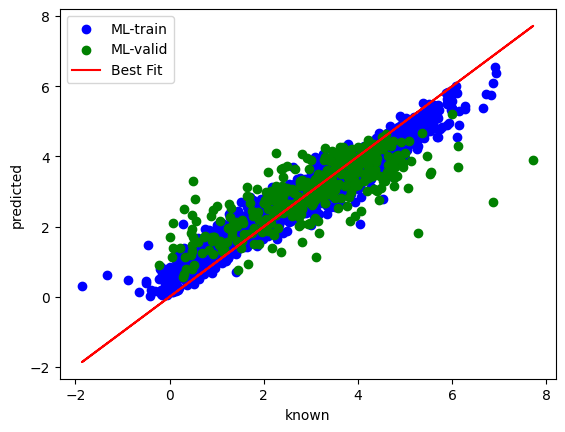

In [ ]:
ccml.plot_predictions(tree_model, x_train, y_train, x_valid, y_valid)

## Save models, CSV files, features

In [ ]:
with open('maob_forest_model.pkl','wb') as model_file:
  pickle.dump(tree_model, model_file)

with open('maob_scaler.pkl','wb') as scaler_file:
  pickle.dump(scaler, scaler_file)

with open('maob_pca.pkl','wb') as pca_file:
  pickle.dump(pca, pca_file)

In [ ]:
y_to_save = np.concatenate((y_train,y_valid))
y_to_save = 10**y_to_save

predictions = tree_model.predict(f)
predictions = 10**predictions

smiles_to_save = np.concatenate((smiles_train,smiles_valid))


ccml.save_csv(smiles_to_save, y_to_save, predictions, "maob_forest_predictions")

,smiles,known,predicted
0,C#CCN1CCN(CN2C(=O)S/C(=C/c3ccc(OCc4ccccc4)cc3)...,5730.0,1465.576007
1,C[C@H](Cc1ccc(OCc2ccncc2)cc1)N(C)CC(=O)O,22044.0,1373.180440
2,C#CCNC1CCc2c(SCc3ccc(Cl)cc3)cccc21,180.0,1230.162032
3,O=C1OCc2ccc(OCc3ccc(F)cc3)cc21,6.4,2184.994038
4,N#Cc1c(F)c(F)c(NC(=O)c2cc3ccc(OCc4ccc(F)cc4)cc...,3450.0,1080.779747
...,...,...,...
3962,CN(C)C(=O)Oc1cccc(/C=C/C(=O)c2ccccc2OC(=O)N(C)...,2900.0,1956.399559
3963,O=C(Nc1ccc(Cl)c(O)c1)c1ccc2cn[nH]c2c1,6220.0,1447.613779
3964,COc1ccc(/C=C2\COc3cc(OCCCCCCNc4c5c(nc6ccccc46)...,19730.0,1317.275791
3965,Cc1cccc2cc(-c3ccccc3)oc12,10730.0,1885.810463


In [ ]:
feats_to_save = np.concatenate((x_train,x_valid))
ccml.save_features(feats_to_save, "maob_rdkit_features")

Features saved to maob_rdkit_features.pkl


## Make predictions
- use a saved model (and possibly a scaler and pca) to make predictions on new data

In [ ]:
smiles_to_test = ["c1cc(O)ccc1","c1cc(F)ccc1", "c1cc(Cl)ccc1"]

predictions = ccml.predict_with_model(smiles_to_test, tree_model, "rdkit", scaler, pca)
print(10**predictions)

[4425.11143644 1397.77032553 3742.36779743]


## Hyperparameter optimization

In [ ]:
for degree in range(1,5,1):
  print("=====================================================")
  print("degree: ", degree)
  lin = ccml.linear_svr_methods(method="svr", degree = degree)
  svr_model = lin.fit(x_train, x_valid, y_train, y_valid)

degree:  1
Linear SVR class initialized.
model selected:  Support Vector Regression
fit model in: 0.023967669999994237 minutes
score for training set:  0.3075065010013851
score for validation set:  0.2576034356244442
degree:  2
Linear SVR class initialized.
model selected:  Support Vector Regression
fit model in: 0.04246719163333334 minutes
score for training set:  0.6236749643543986
score for validation set:  0.5188493500722101
degree:  3
Linear SVR class initialized.
model selected:  Support Vector Regression
fit model in: 0.0656367112166663 minutes
score for training set:  0.7991857672147488
score for validation set:  0.5704516153111455
degree:  4
Linear SVR class initialized.
model selected:  Support Vector Regression
fit model in: 0.16488759344999834 minutes
score for training set:  0.8933712483142793
score for validation set:  0.49359457791977124


## Loss analysis with Kmeans
- This tools uses k-means clustering to find groups based on the training set and then also assigns clusters to the validation set.
- Mean and maximum losses (mean absolute error) are calculated for each cluster/group.
- Displays loss data for training and validation sets in each cluster.
- Returns a list of dataframes with each validation cluster.
- Also returns a list of images for each validation cluster

In [13]:
valid_preds = tree_model.predict(x_valid)
train_preds = tree_model.predict(x_train)

In [14]:
dfs, pics = ccml.kmeans_loss(x_train, x_valid, y_train, y_valid, smiles_valid, train_preds, valid_preds, number_groups=10)

CSV for training set saved!
CSV for valiation set saved!
Type     Group Number   Number Molecules   Mean Loss   Std Loss   Max Loss
Train               0                 84        0.23       0.17       1.03
Valid               0                  5        0.54       0.44       1.06
--------------------------------------------------------------------------
                                          Δ     0.30 

Train               1                  3        0.18       0.03       0.22
Valid               1                  0         nan        nan        nan
--------------------------------------------------------------------------
                                          Δ      nan 

Train               2                620        0.26       0.26       1.66
Valid               2                 76        0.63       0.58       2.56
--------------------------------------------------------------------------
                                          Δ     0.37 

Train               3       

/content/CafChem/CafChemBML.py:705: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.sort_values(by=["Valid loss"],inplace=True, ascending=False)
[13:40:53] 

****
Pre-condition Violation
no draw context
Violation occurred on line 211 in file /project/build/temp.linux-x86_64-cpython-311/rdkit/Code/GraphMol/MolDraw2D/MolDraw2DCairo.cpp
Failed Expression: dp_cr
----------
Stacktrace:
----------
****

/usr/local/lib/python3.11/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:343: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


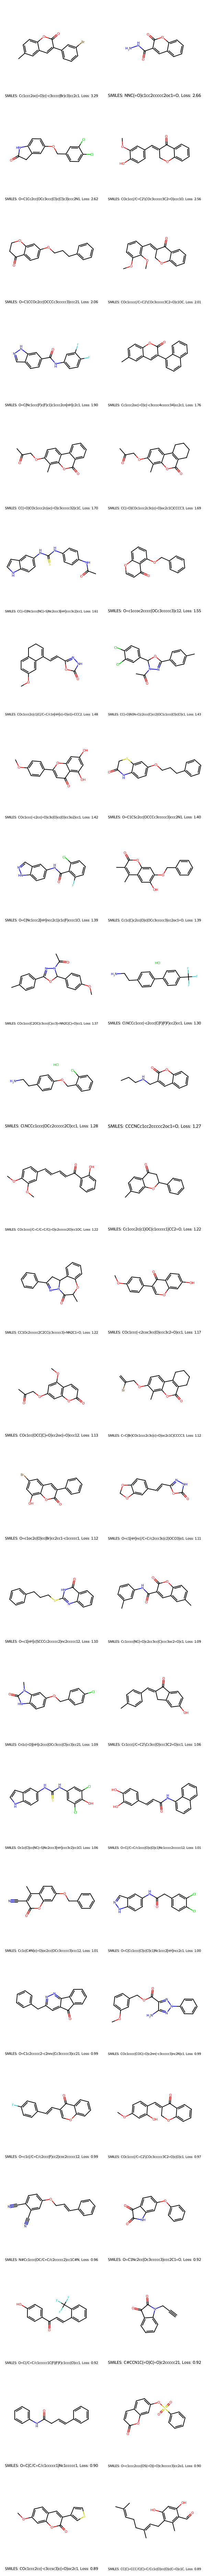

In [15]:
pics[6]

### Find common fragments in a set of SMILES
- submit a list of SMILES from the k-means groups with larger losses and find common fragments.
- The common fragment tool accepts a minimum threshold, which is the fraction of molecules in the list which must contain a common fragment.
- it also accepts an integer specifying which fragment found to return: 0 --> return the longest fragment found, 1 --> return the second longest fragment found, etc.
- returns an image of the molecules containing the fragment, the smiles string for the fragment, and the fraction of the total number of molecules that contain that fragment.

In [16]:
smiles_list = dfs[6]["Valid SMILES"].to_list()

img, mcsmiles, frac_with_frag = ccml.get_common_fragment(smiles_list, 0.15, 1)

Threshold: 0.150
Could not match 141 molecules to the fragment
Found 33 molecules containing the fragment
Fraction of molecules with fragment: 0.190
Fragment SMILES: *1~*~*~*(~*~*~*2~*~*~*~*~*~2)~*~*~1



Threshold: 0.200
Could not match 139 molecules to the fragment
Found 35 molecules containing the fragment
Fraction of molecules with fragment: 0.201
Fragment SMILES: *~*1~*~*~*2~*~*~*~*~*~2~*~1



Threshold: 0.250
Could not match 111 molecules to the fragment
Found 63 molecules containing the fragment
Fraction of molecules with fragment: 0.362
Fragment SMILES: *1~*~*~*2~*~*~*~*~*~2~*~1



Threshold: 0.300
Could not match 111 molecules to the fragment
Found 63 molecules containing the fragment
Fraction of molecules with fragment: 0.362
Fragment SMILES: *1~*~*~*2~*~*~*~*~*~2~*~1



Threshold: 0.350
Could not match 111 molecules to the fragment
Found 63 molecules containing the fragment
Fraction of molecules with fragment: 0.362
Fragment SMILES: *1~*~*~*2~*~*~*~*~*~2~*~1



Threshold: 0.

In [17]:
print(f"smiles for fragment: {mcsmiles} occuring in {100*frac_with_frag:.2f}% of molecules")

smiles for fragment: *~*1~*~*~*2~*~*~*~*~*~2~*~1 occuring in 20.11% of molecules


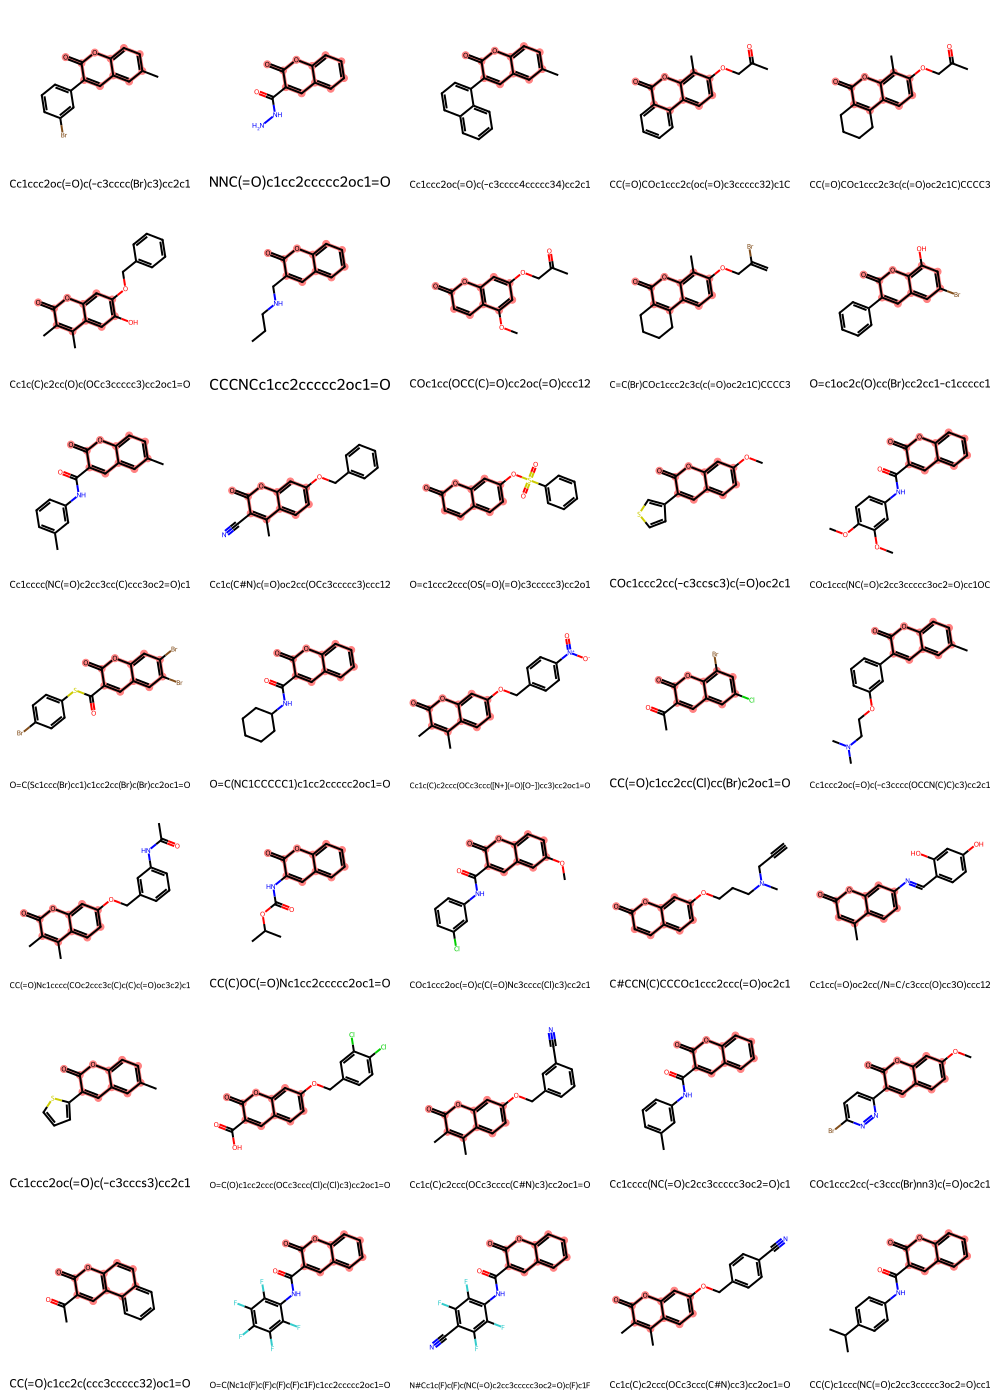

In [18]:
img